In [72]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [73]:
ds = pd.read_csv('data.csv')
ds

,label,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch1015,ch1016,ch1017,ch1018,ch1019,ch1020,ch1021,ch1022,ch1023,ch1024
0,0,578,574,563,553,544,536,535,523,511,...,1,1,5,4,1,1,1,1,4,2
1,1,579,576,563,553,545,538,527,523,514,...,1,2,1,1,1,1,1,1,1,1
2,2,579,572,561,558,540,539,531,519,509,...,4,4,1,1,1,1,1,1,1,4
3,3,581,565,562,549,542,540,531,515,517,...,1,1,1,1,8,1,2,1,1,1
4,4,581,575,563,550,544,531,532,521,514,...,1,1,1,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,5,23226,22853,22476,22166,21844,21507,21135,20881,20551,...,22,18,17,6,5,23,1,7,14,1
8636,6,23221,22848,22503,22187,21838,21496,21180,20881,20541,...,1,1,1,35,39,16,16,1,37,15
8637,7,23207,22870,22527,22185,21842,21513,21202,20844,20537,...,8,47,45,1,1,1,1,1,46,1
8638,8,23208,22876,22533,22131,21817,21468,21152,20856,20543,...,1,1,11,12,27,15,1,22,2,1


In [74]:
from sklearn.model_selection import train_test_split

y = ds['label'].values
X = ds.drop('label', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train = log10(x_train) / 6;
x_test = log10(x_test) / 6;


x_train.shape
# max(x_train.all())

(6048, 1024)

In [75]:
from keras import Sequential
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

batch_size = 128
num_classes = 10
epochs = 20

cnn_model = Sequential()
cnn_model.add(Input(shape=(1024,1), name="input"))
cnn_model.add(Conv1D(32, 15, activation='relu', input_shape=(1024,32)))
cnn_model.add(MaxPooling1D(pool_size=2,input_shape=(512,32)))
cnn_model.add(Conv1D(64, 7, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='sparse_categorical_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 1010, 32)          512       
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 505, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 499, 64)           14400     
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 249, 64)          0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 15936)             0         
                                                                 
 dense_9 (Dense)             (None, 128)             

Text(0, 0.5, 'Accuracy')

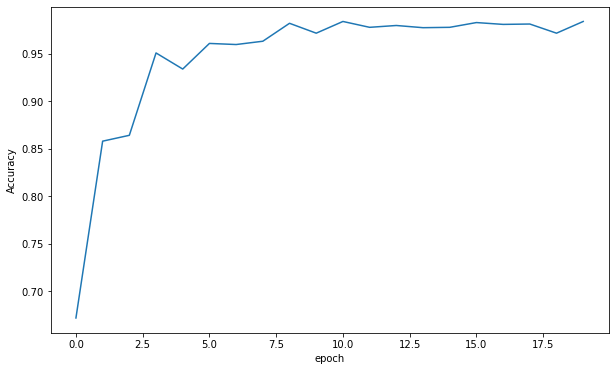

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [77]:
from sklearn.metrics import accuracy_score
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
accuracy_score(y_test, y_pred_cnn)

0.9841820987654321

In [79]:
cnn_model.save('saved_model')
test = np.hstack((y_test.reshape(-1, 1), X_test))
np.savetxt('test.csv', test, delimiter=',', fmt="%d")

INFO:tensorflow:Assets written to: saved_model\assets
